# Two linear models
- Findings, linear regression is not optimal for looking at stockprices
- The result can be improved by using many models and taking the mean of them

In [45]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [46]:
df = pd.read_csv("NAS.csv")                         #Read the csv
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index

In [47]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
df.dropna(inplace=True)  #Dropping all columns with NaN
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [50]:
X = df[['Open']]
y= (df['Close']) 


In [51]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:

from sklearn import preprocessing
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)  #Fits it with a linar regression

from sklearn.linear_model import SGDRegressor
# SkLearn SGD classifier
sgd = SGDRegressor()
sgd.fit(X_train, y_train)


SGDRegressor()

In [55]:
print("LinearRegression intercept" +str(regressor.intercept_))
print("LinearRegression coef" +str(regressor.coef_))

print("SGDRegression intercept" +str(sgd.intercept_))
print("SGDRegression coef" +str(sgd.coef_))

LinearRegression intercept80.28803066101693
LinearRegression coef[55.3016636]
SGDRegression intercept[80.28366814]
SGDRegression coef[55.31798023]


In [56]:
LR_pred = regressor.predict(X_test)
SGD_pred = sgd.predict(X_test)

In [57]:
from sklearn import metrics
print("SGD Regressor")
print('Mean Squared Error :',metrics.mean_squared_error(y_test, sgd.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, sgd.predict(X_test)))
print("Score:", sgd.score(X_test, y_test))
print("\nLinear Regressor")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))
print("Score:", regressor.score(X_test, y_test))

SGD Regressor
Mean Squared Error : 6.094619516419646
Mean Absolute Error : 1.5294118236886796
Score: 0.9979126159297576

Linear Regressor
Mean Absolute Error: 1.5290304839950808
Mean Squared Error: 6.088779658694799
Root Mean Squared Error: 2.4675452698369686
Score: 0.9979146160588803


In [58]:
df2 = pd.DataFrame({'Actual': y_test, 'SGD': SGD_pred, 'LR': LR_pred})
df2.sort_values(by='Date',inplace=True) 
df2

,Actual,SGD,LR
Date,,,
2003-12-19,18.454201,19.312149,19.334496
2004-01-19,17.997101,18.456283,18.478882
2004-01-26,18.054300,18.171062,18.193745
2004-01-27,18.111401,17.999889,18.022622
2004-02-05,16.854500,17.086898,17.109901
...,...,...,...
2020-10-05,0.989000,0.988124,1.015876
2020-10-07,0.922600,0.963956,0.991715
2020-10-09,0.696400,0.768416,0.796232


<AxesSubplot:xlabel='Date'>

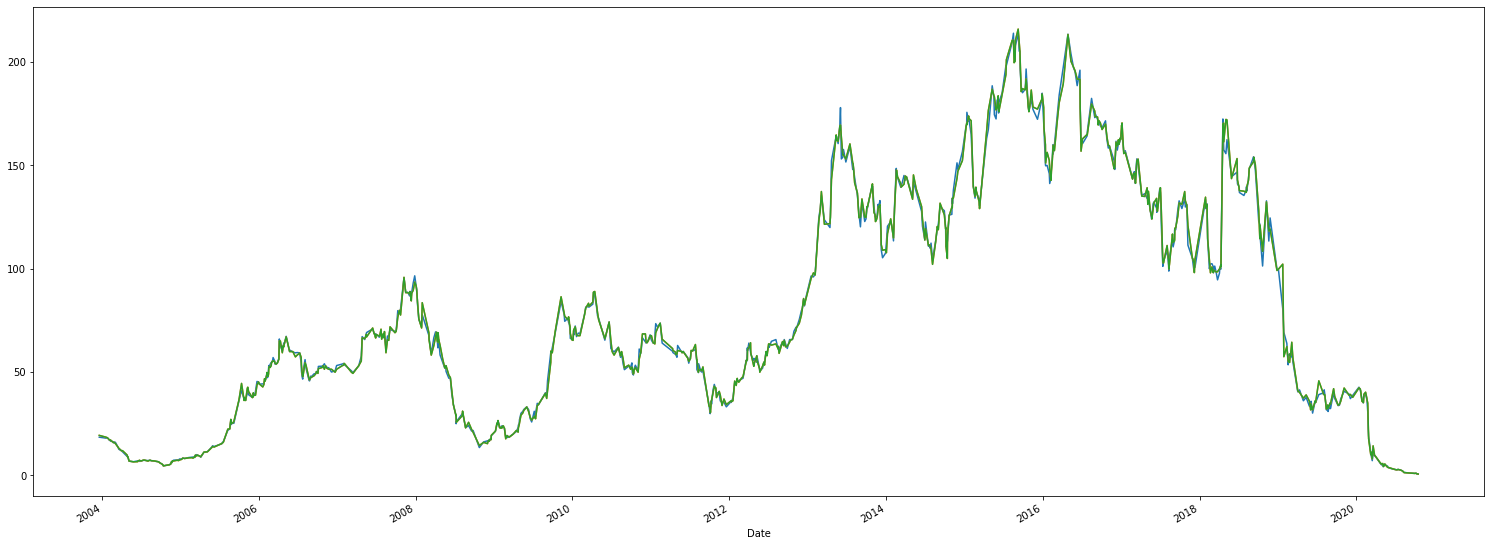

In [59]:
df2['Actual'].plot(figsize=(26,10))
df2['SGD'].plot(figsize=(26,10))
df2['LR'].plot(figsize=(26,10))

<AxesSubplot:xlabel='Date'>

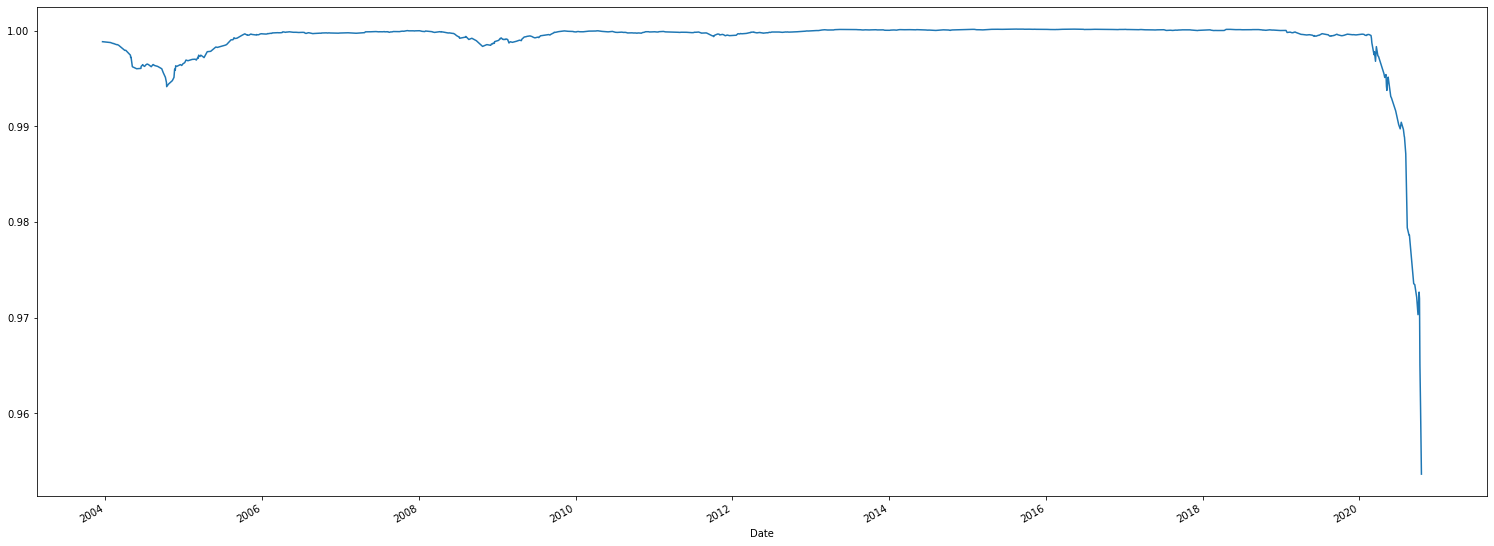

In [60]:
diffSGD_LR = df2['SGD']/df2['LR']
diffSGD_LR.plot(figsize=(26,10))

In [65]:
# diffAct_LR = df2['Actual']/df2['LR']
# diffAct_SGD = df2['Actual']/df2['SGD']
# diffAct_SGD.plot(figsize=(26,10), color = "Red")
# diffAct_LR.plot(figsize=(26,10))


<AxesSubplot:xlabel='Date'>

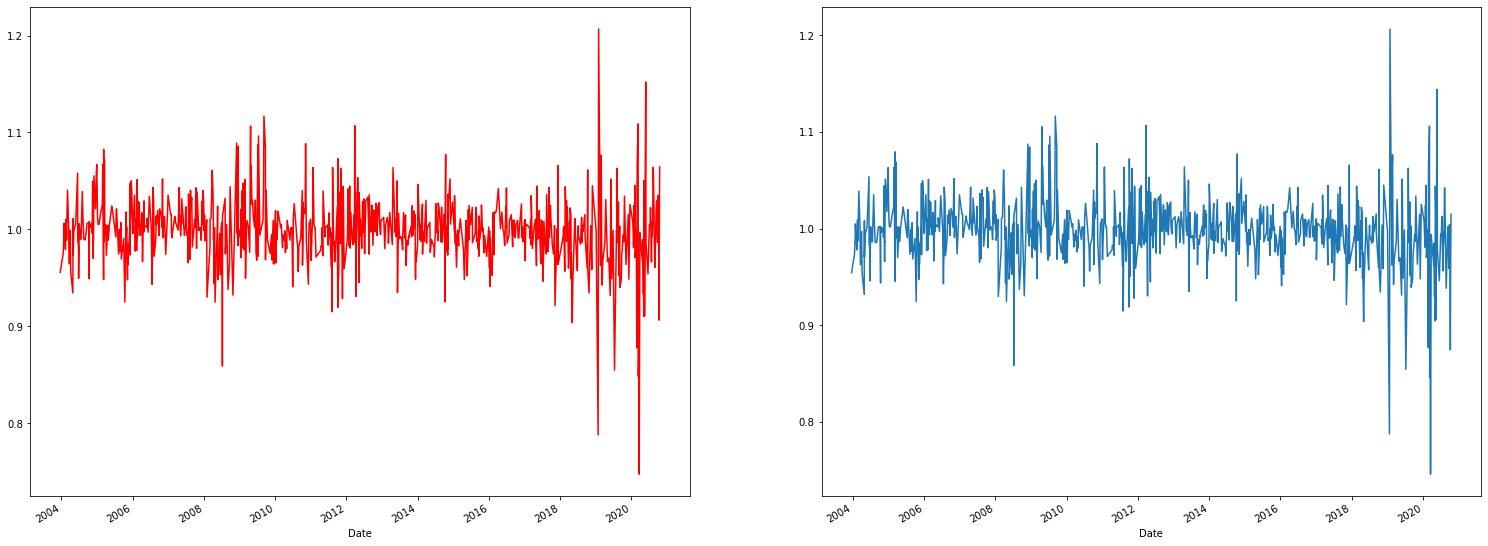

In [64]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

diffAct_SGD.plot(figsize=(26,10), color = "Red", ax=axes[0])
diffAct_LR.plot(figsize=(26,10), ax=axes[1])


## Predict todays closing price by giving todays opening price

In [79]:
from pandas import DataFrame
#from statistics import mean

def predictPrice(opening, *argv): #The args are the prediction algorithms you want to test on
    opPrice=pd.DataFrame([[opening]])
    opPrice=scaler.transform(opPrice)
    i=0
    predList = []
    for model in argv:
        print("Model " +str(i) + " "+ str(model.predict(opPrice)))
        predList.append(model.predict(opPrice))
    meanVal = sum(predList)/len(predList)
    print(f'The mean of the models are {meanVal}')

        

In [84]:
predictPrice(10.5000, regressor, sgd)

Model 0 [10.48054177]
Model 0 [10.45558271]
The mean of the models are [10.46806224]
